In [4]:
!pip install sentence-transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 1.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 10.0 MB/s eta 0:00:00
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125923 sha256=0ec6282ccebee66422246e01cfe195fe963fbb77ce369bac8bb59aacfec25f4b
  Stored in directory: /root/.cache/pip/wheels/62/f2/10/1e606fd5f02395388f74e7462910fe851042f97238cbbd902f
Successfully built sentence-transformers


In [144]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.metrics.cluster import normalized_mutual_info_score, adjusted_rand_score
from sentence_transformers import SentenceTransformer
import numpy as np

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import FactorAnalysis
from sklearn.model_selection import cross_val_score, StratifiedKFold

'''
Variables:
---------

corpus : list of documents
embeddings : documents embeddings of size NxM (N : number of documents, M : embedding dimension)
red_emd : reduced embeddings matrix using dimentionality reduction
k : number of clusters
labels : documents labels
pred : list of clustering predicted clusters

''';

In [114]:
# import data
ng20 = fetch_20newsgroups(subset='test')
corpus = ng20.data[:2000]
labels = ng20.target[:2000]
k = len(set(labels))

# embedding
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')
embeddings = model.encode(corpus)


In [128]:
def dim_red(mat, p):
    '''
    Perform dimensionality reduction

    Input:
    -----
        mat : NxM list
        p : number of dimensions to keep
    Output:
    ------
        red_mat : NxP list such that p<<m
    '''

    red_mat = TSNE(n_components=p, learning_rate='auto',init='random').fit_transform(mat)

    return red_mat

In [129]:
def clust(mat, k):
    '''
    Perform clustering

    Input:
    -----
        mat : input list
        k : number of cluster
    Output:
    ------
        pred : list of predicted labels
    '''
    pred_cluster = KMeans(n_clusters=k, random_state=0, n_init="auto").fit(mat)


    return pred_cluster

In [136]:
#plotting the results:
def plotting(pred_clust,pred_tsne):

    pred_labels= pred_clust.labels_
    #Getting the Centroids
    centroids = pred_clust.cluster_centers_
    u_labels = np.unique(pred_labels)

    for i in u_labels:
        plt.scatter(pred_tsne[pred_labels == i , 0] , pred_tsne[pred_labels == i , 1] , label = i)
    plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')
    plt.legend()
    plt.show()

NMI: 0.41 
ARI: 0.23


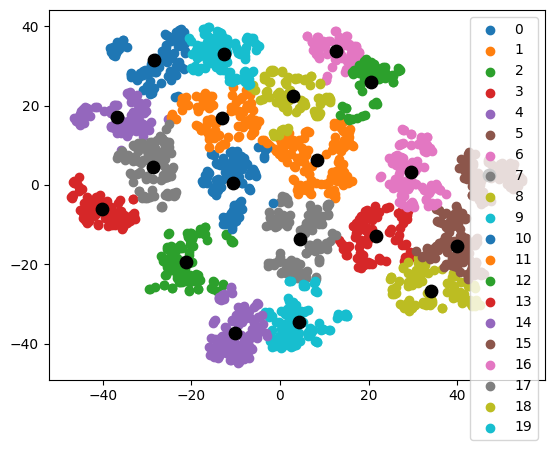

In [140]:

# perform dimentionality reduction
red_emb = dim_red(embeddings, 3)

# perform clustering
pred_clust = clust(red_emb, k)

pred= pred_clust.labels_

# evaluate clustering results
nmi_score = normalized_mutual_info_score(pred,labels)
ari_score = adjusted_rand_score(pred,labels)

print(f'NMI: {nmi_score:.2f} \nARI: {ari_score:.2f}')

# perform dimentionality reduction
pred_final = dim_red(red_emb, 2)
pred_clust = clust(pred_final, k)
plotting(pred_clust,pred_final)




In [146]:
def cross_validate_reduction(red_emb, X, y, n_components=2):
    reduced_X = red_emb
    clf = RandomForestClassifier()
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    scores = cross_val_score(clf, reduced_X, y, cv=cv, scoring='accuracy')
    return scores

# reduce_with_X = red_emb with method X
#umap_scores = cross_validate_reduction(red_emb, corpus, labels)
#pca_scores = cross_validate_reduction(red_emb, corpus, labels)
tsne_scores = cross_validate_reduction(red_emb, corpus, labels)

#print("UMAP Scores:", umap_scores)
#print("PCA Scores:", pca_scores)
print("t-SNE Scores:", tsne_scores)

t-SNE Scores: [0.635  0.645  0.63   0.6225 0.595 ]
